<a href="https://colab.research.google.com/github/jjmmchema/robbery-data/blob/JKP-tests/Robbery_Reports_by_Type_in_Toronto_Jan_2014_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Course 8 Week 1&2 Activity

## 1. Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go

## 2. Read csv file

In [ ]:
df = pd.read_csv('Robbery_Open_Data.csv')

In [ ]:
df.shape

(33063, 31)

## 3. Check for null values and clean them

In [ ]:
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             2
OCC_MONTH            2
OCC_DAY              2
OCC_DOY              2
OCC_DOW              2
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

Select null values with a mask and grab the entries

In [ ]:
null_mask = df.isnull().any(axis=1)
entries_with_nulls = df[null_mask]

In [ ]:
entries_with_nulls[['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW']]

,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW
4095,NaN,NaN,NaN,NaN,NaN
17212,NaN,NaN,NaN,NaN,NaN


Drop rows that have null values and reset the index

In [ ]:
df_clean = df.dropna(axis=0)
df_clean.reset_index(inplace=True)
df_clean.drop(columns='index', inplace=True)

<ipython-input-11-56cc46b2c040>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns='index', inplace=True)


Double-check if there are any remaining null values

In [ ]:
df_clean.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
REPORT_DATE          0
OCC_DATE             0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
LOCATION_TYPE        0
PREMISES_TYPE        0
UCR_CODE             0
UCR_EXT              0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

## 4. Figure out how to visualize the data

In [ ]:
df_clean.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,6.327780e-09,5.664924e-09,1,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
1,6.327780e-09,5.664924e-09,2,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
2,-8.837004e+06,5.413576e+06,3,GO-20141262818,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,210,Robbery - Business,Robbery,167,Church-Wellesley,75,Church-Yonge Corridor (75),-79.384154,43.663898
3,-8.838990e+06,5.411070e+06,4,GO-20141260912,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401998,43.647607
4,-8.851703e+06,5.419157e+06,5,GO-20141262644,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,150,Robbery - Purse Snatch,Robbery,113,Weston,113,Weston (113),-79.516198,43.700152


In [ ]:
df_clean.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE',
       'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
       'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

If we use the unique function we see that there are different robbery categories:

In [ ]:
df_clean['OFFENCE'].unique()

array(['Robbery - Swarming', 'Robbery - Mugging', 'Robbery - Business',
       'Robbery With Weapon', 'Robbery - Purse Snatch', 'Robbery - Other',
       'Robbery - Financial Institute', 'Robbery - Armoured Car',
       'Robbery - Vehicle Jacking', 'Robbery - Taxi',
       'Robbery - Home Invasion', 'Robbery - Delivery Person',
       'Robbery - Atm', 'Robbery To Steal Firearm'], dtype=object)

We want to see the number of reports for every type of robbery per year, therefore we group by those categories. We also select EVENT_UNIQUE_ID in order to apply the count function correctly.

In [ ]:
df_grouped = df_clean[['EVENT_UNIQUE_ID', 'REPORT_YEAR', 'OFFENCE']].groupby(['REPORT_YEAR', 'OFFENCE']).count()
df_grouped
df_grouped.columns

Index(['EVENT_UNIQUE_ID'], dtype='object')

Attempt 1: doesn't show the plot that we were expecting. The data isn't properly categorized.

<Axes: xlabel='REPORT_YEAR,OFFENCE'>

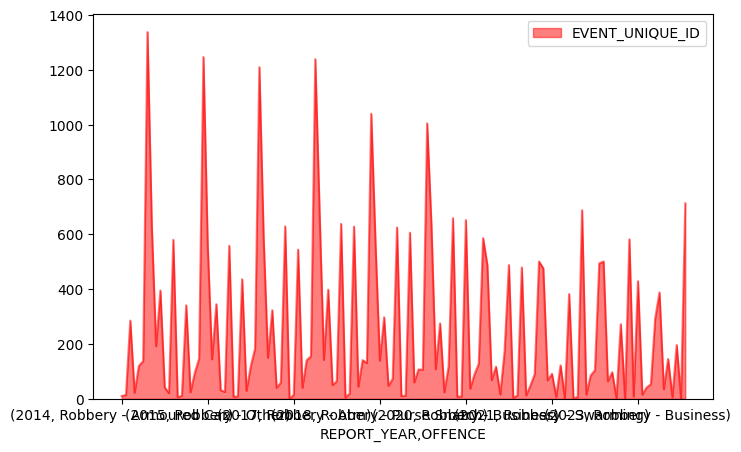

In [ ]:
df_grouped.plot(kind='area', stacked=False, figsize=(8, 5), color='r')

Lets try to see the df_grouped:

In [ ]:
df_grouped.head(13)

EVENT_UNIQUE_ID
REPORT_YEAR OFFENCE                                       
2014        Robbery - Armoured Car                      10
            Robbery - Atm                               14
            Robbery - Business                         285
            Robbery - Delivery Person                   22
            Robbery - Financial Institute              120
            Robbery - Home Invasion                    138
            Robbery - Mugging                         1338
            Robbery - Other                            630
            Robbery - Purse Snatch                     192
            Robbery - Swarming                         395
            Robbery - Taxi                              42
            Robbery - Vehicle Jacking                   20
            Robbery With Weapon                        580

If we look at df_grouped.index, we see that we have a multi index, we don't want that. We only want the year as the index, and the robbery time as columns.

In [ ]:
df_grouped.index


MultiIndex([(2014,        'Robbery - Armoured Car'),
            (2014,                 'Robbery - Atm'),
            (2014,            'Robbery - Business'),
            (2014,     'Robbery - Delivery Person'),
            (2014, 'Robbery - Financial Institute'),
            (2014,       'Robbery - Home Invasion'),
            (2014,             'Robbery - Mugging'),
            (2014,               'Robbery - Other'),
            (2014,        'Robbery - Purse Snatch'),
            (2014,            'Robbery - Swarming'),
            ...
            (2023, 'Robbery - Financial Institute'),
            (2023,       'Robbery - Home Invasion'),
            (2023,             'Robbery - Mugging'),
            (2023,               'Robbery - Other'),
            (2023,        'Robbery - Purse Snatch'),
            (2023,            'Robbery - Swarming'),
            (2023,                'Robbery - Taxi'),
            (2023,     'Robbery - Vehicle Jacking'),
            (2023,      'Robbe

We can unstack the second level (index 1) of the multi index:

In [ ]:
df_area = df_grouped.unstack(level=1)
df_area.head()

EVENT_UNIQUE_ID                                   \
OFFENCE     Robbery - Armoured Car Robbery - Atm Robbery - Business   
REPORT_YEAR                                                           
2014                          10.0          14.0              285.0   
2015                           6.0          11.0              341.0   
2016                           7.0           9.0              436.0   
2017                           1.0          14.0              544.0   
2018                           5.0          19.0              628.0   

                                                                     \
OFFENCE     Robbery - Delivery Person Robbery - Financial Institute   
REPORT_YEAR                                                           
2014                             22.0                         120.0   
2015                             24.0                          95.0   
2016                             29.0                         118.0   
2017                             40.0                         141.0   
2018                             44.0                         141.0   

                                                                       \
OFFENCE     Robbery - Home Invasion Robbery - Mugging Robbery - Other   
REPORT_YEAR                                                             
2014                          138.0            1338.0           630.0   
2015                          146.0            1247.0           559.0   
2016                          183.0            1210.0           584.0   
2017                          155.0            1239.0           679.0   
2018                          130.0            1040.0           565.0   

                                                                      \
OFFENCE     Robbery - Purse Snatch Robbery - Swarming Robbery - Taxi   
REPORT_YEAR                                                            
2014                         192.0              395.0           42.0   
2015                         144.0              345.0           31.0   
2016                         150.0              323.0           40.0   
2017                         142.0              398.0           50.0   
2018                         139.0              297.0           47.0   

                                                                \
OFFENCE     Robbery - Vehicle Jacking Robbery To Steal Firearm   
REPORT_YEAR                                                      
2014                             20.0                      NaN   
2015                             25.0                      NaN   
2016                             59.0                      NaN   
2017                             64.0                      NaN   
2018                             73.0                      NaN   

                                 
OFFENCE     Robbery With Weapon  
REPORT_YEAR                      
2014                      580.0  
2015                      558.0  
2016                      629.0  
2017                      638.0  
2018                      625.0

Now, the index seems fine, however, lets see what happened to the columns:

In [ ]:
df_area.columns

MultiIndex([('EVENT_UNIQUE_ID',        'Robbery - Armoured Car'),
            ('EVENT_UNIQUE_ID',                 'Robbery - Atm'),
            ('EVENT_UNIQUE_ID',            'Robbery - Business'),
            ('EVENT_UNIQUE_ID',     'Robbery - Delivery Person'),
            ('EVENT_UNIQUE_ID', 'Robbery - Financial Institute'),
            ('EVENT_UNIQUE_ID',       'Robbery - Home Invasion'),
            ('EVENT_UNIQUE_ID',             'Robbery - Mugging'),
            ('EVENT_UNIQUE_ID',               'Robbery - Other'),
            ('EVENT_UNIQUE_ID',        'Robbery - Purse Snatch'),
            ('EVENT_UNIQUE_ID',            'Robbery - Swarming'),
            ('EVENT_UNIQUE_ID',                'Robbery - Taxi'),
            ('EVENT_UNIQUE_ID',     'Robbery - Vehicle Jacking'),
            ('EVENT_UNIQUE_ID',      'Robbery To Steal Firearm'),
            ('EVENT_UNIQUE_ID',           'Robbery With Weapon')],
           names=[None, 'OFFENCE'])

We now have the multi index in the columns! As before, we want to fix this, by eliminating the level of EVENT_UNIQUE_ID. We can do that as follows:

In [ ]:
# Drop the first level of the multi index
df_area.columns = df_area.columns.droplevel(level=0)

# Change the name of the columns category
df_area.columns.names = ['ROBBERY TYPE']

# Display first 5 rows
df_area.head()

ROBBERY TYPE,Robbery - Armoured Car,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery To Steal Firearm,Robbery With Weapon
REPORT_YEAR,,,,,,,,,,,,,,
2014,10.0,14.0,285.0,22.0,120.0,138.0,1338.0,630.0,192.0,395.0,42.0,20.0,NaN,580.0
2015,6.0,11.0,341.0,24.0,95.0,146.0,1247.0,559.0,144.0,345.0,31.0,25.0,NaN,558.0
2016,7.0,9.0,436.0,29.0,118.0,183.0,1210.0,584.0,150.0,323.0,40.0,59.0,NaN,629.0
2017,1.0,14.0,544.0,40.0,141.0,155.0,1239.0,679.0,142.0,398.0,50.0,64.0,NaN,638.0
2018,5.0,19.0,628.0,44.0,141.0,130.0,1040.0,565.0,139.0,297.0,47.0,73.0,NaN,625.0


Now, lets try to plot the area chart:

<Axes: xlabel='REPORT_YEAR'>

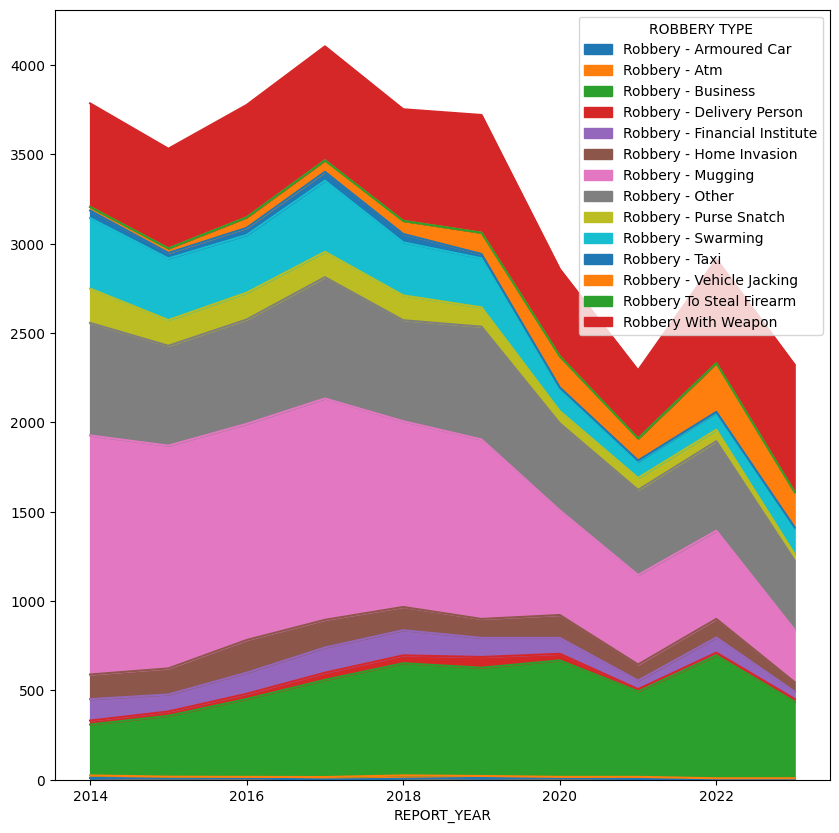

In [ ]:
df_area.plot.area(figsize=(10, 10), stacked=True)

Looks fine, however there seems to be some weird things like why do all area plots for each category have the a similar shape? Let's try setting the stacked argument to False:

<Axes: xlabel='REPORT_YEAR'>

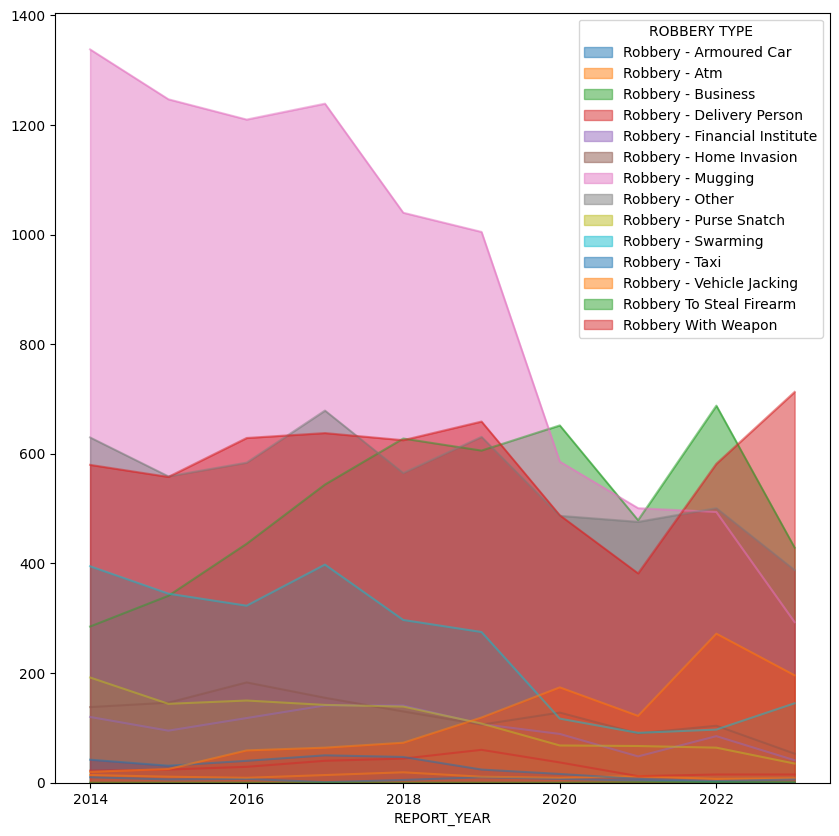

In [ ]:
df_area.plot.area(figsize=(10, 10), stacked=False)

Much better! Let's add some labels to the plot:

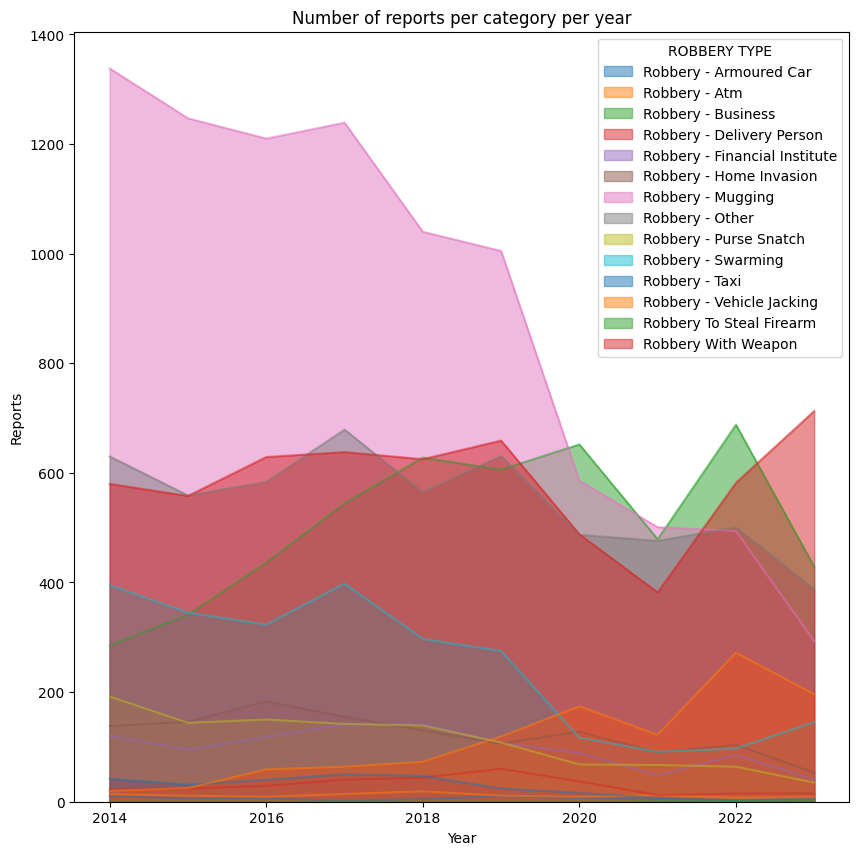

In [ ]:
ax = df_area.plot.area(figsize=(10, 10), stacked=False)
ax.set_title('Number of reports per category per year')
ax.set_xlabel('Year')
ax.set_ylabel('Reports')
plt.show()

## Easier way to do it:

In [ ]:
df_easy = df_clean.groupby(['REPORT_YEAR', 'OFFENCE'])['OFFENCE']\
            .count().\
            unstack(1)

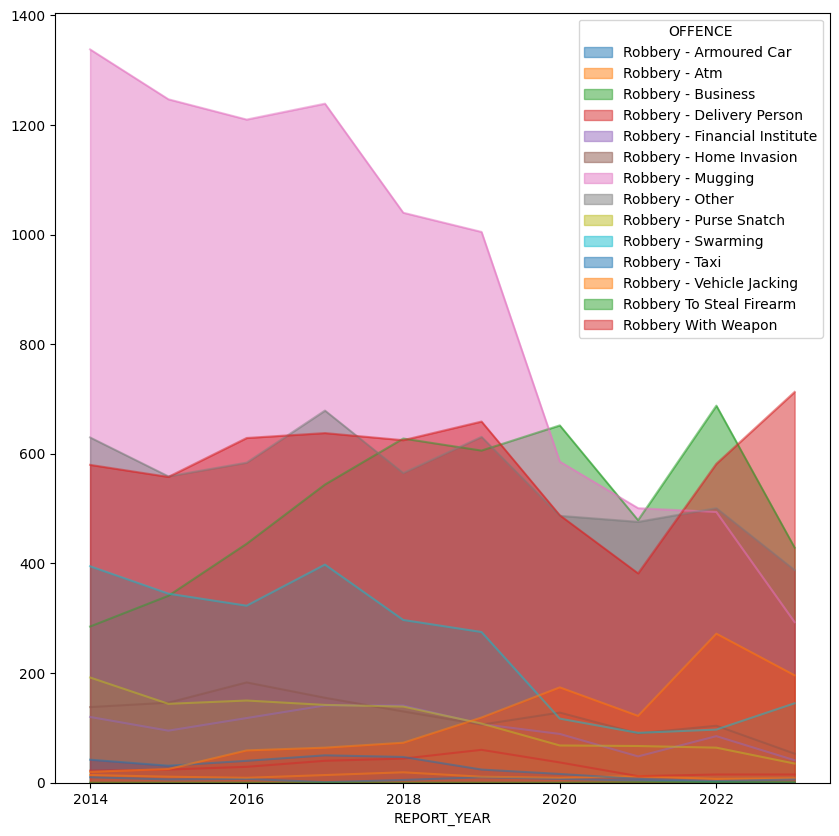

In [ ]:
df_easy.plot.area(stacked=False, figsize=(10, 10))
ax.set_title('Number of reports per category per year')
ax.set_xlabel('Year')
ax.set_ylabel('Reports')
plt.show()

<Axes: xlabel='REPORT_YEAR'>

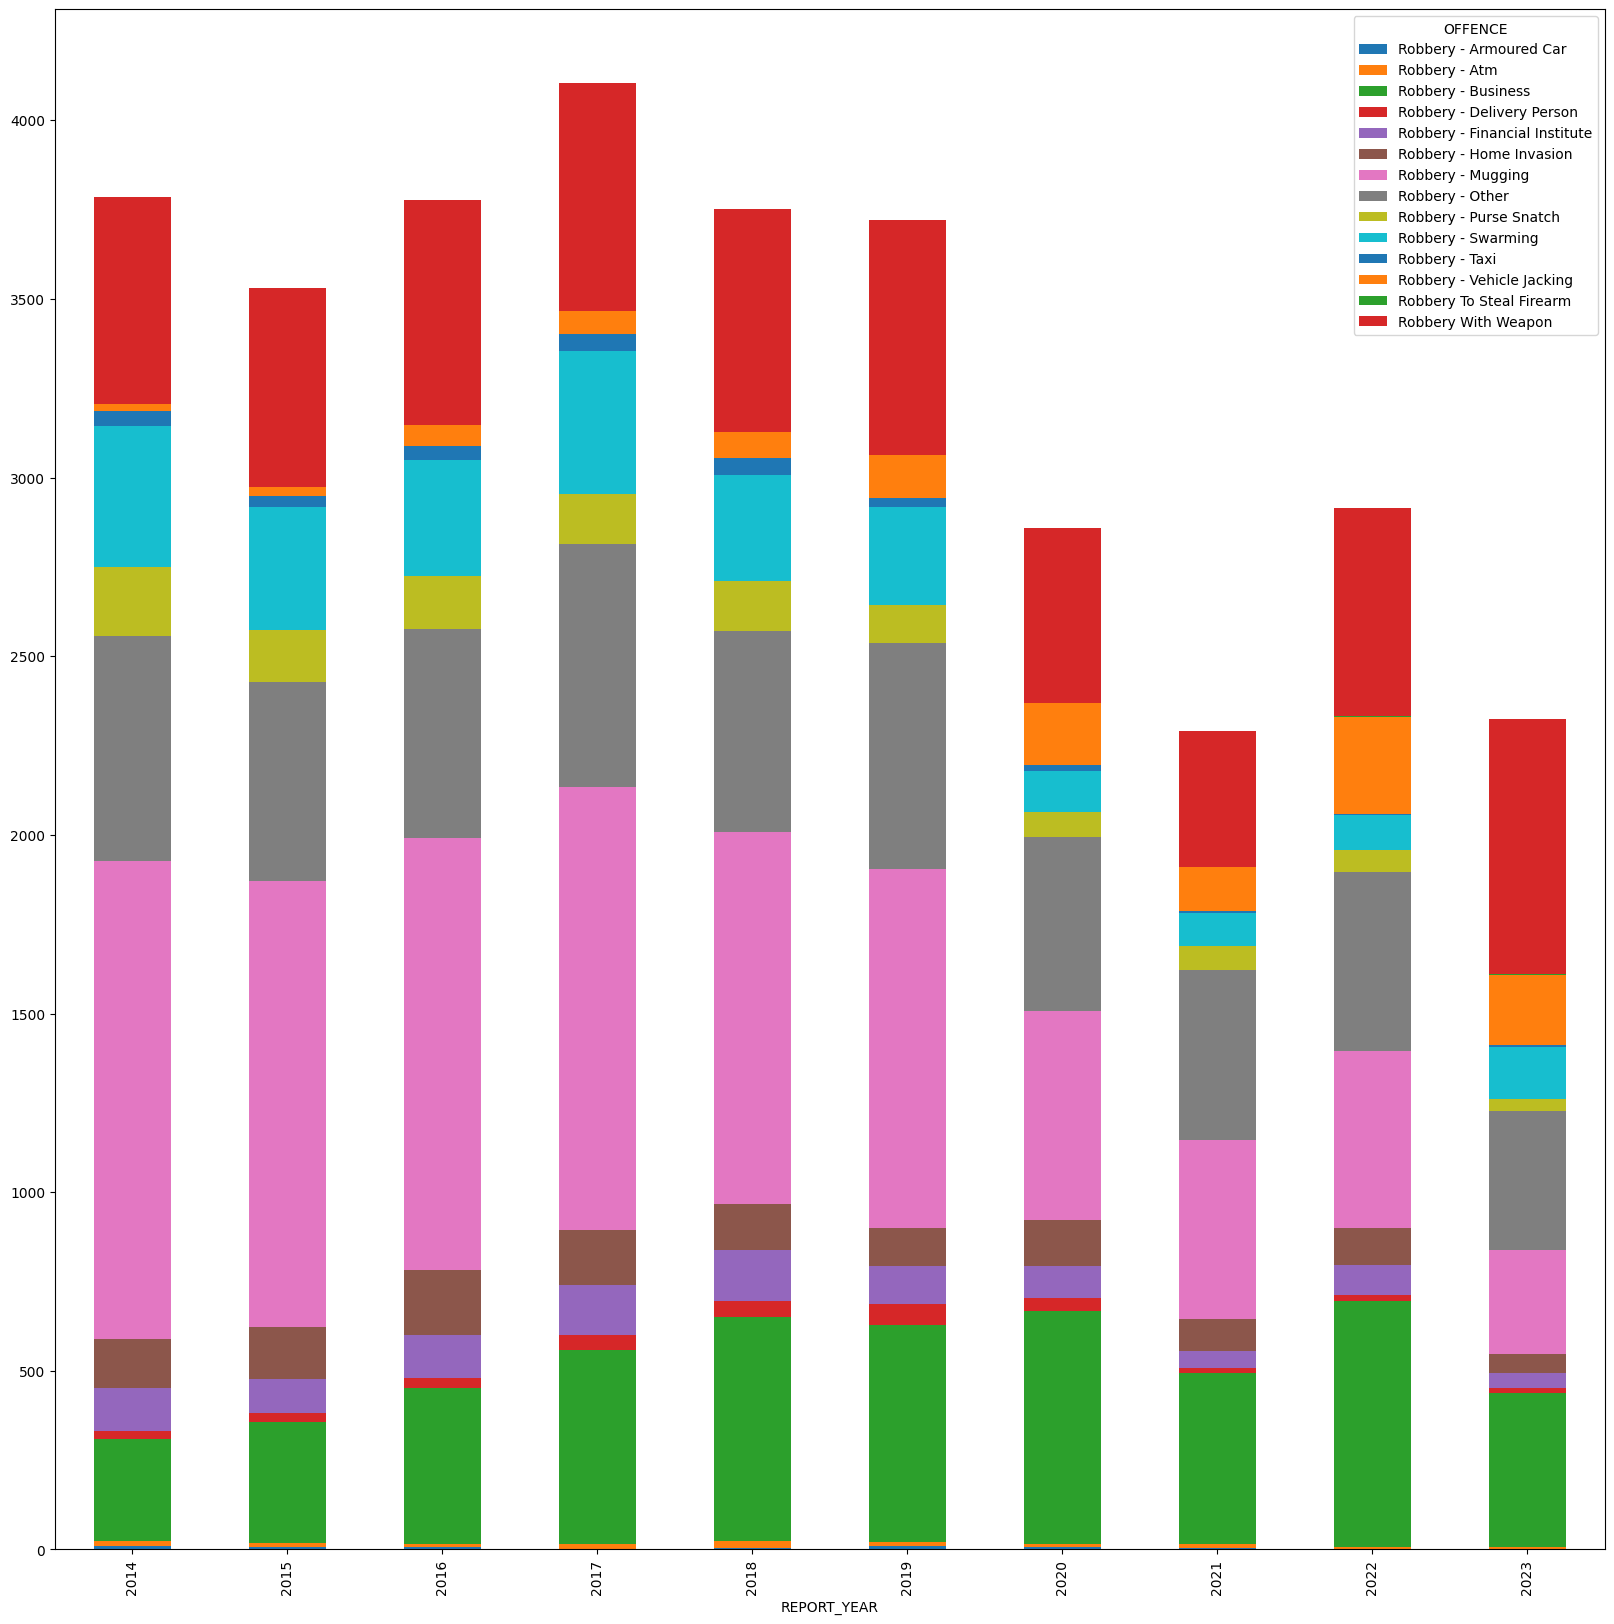

In [ ]:
df_easy.plot.bar(figsize=(20, 20), stacked=True)

<Axes: xlabel='REPORT_YEAR'>

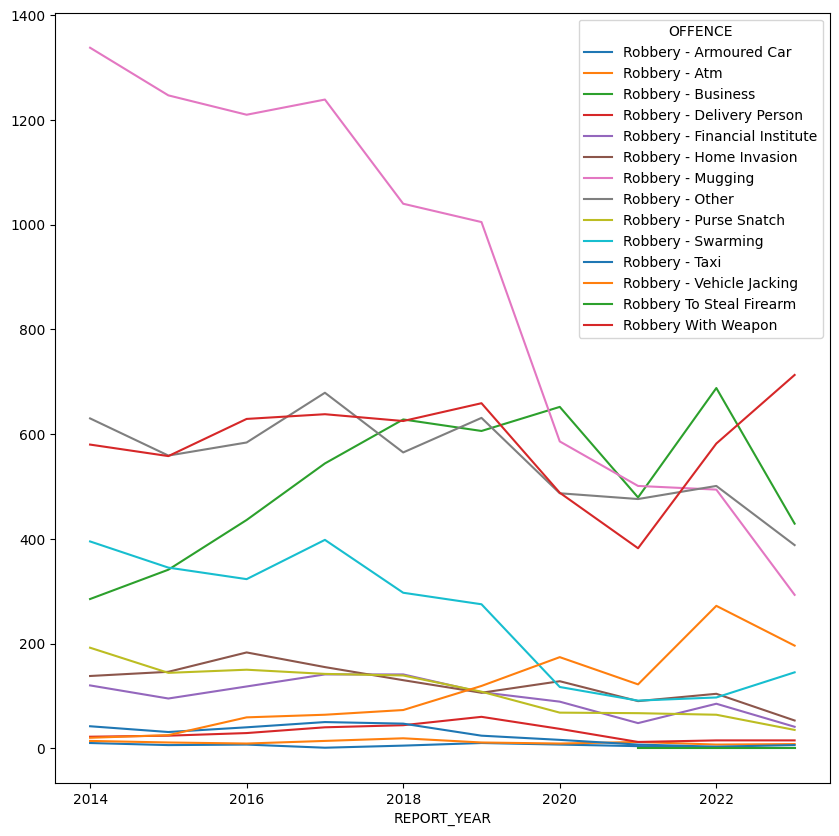

In [ ]:
df_easy.plot.line(figsize=(10, 10))

# Part 2 - Course 8 Week 3 Activity

In [ ]:
!pip install pywaffle
!pip install wordcloud
import seaborn as sns
from pywaffle import Waffle

from wordcloud import WordCloud, STOPWORDS

  Using cached pywaffle-1.1.0-py2.py3-none-any.whl (30 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 7.1 MB/s eta 0:00:00


In [ ]:
df_easy
df_waffles = df_easy.drop(columns=['Robbery To Steal Firearm', 'Robbery - Armoured Car'])
df_waffles

OFFENCE,Robbery - Atm,Robbery - Business,Robbery - Delivery Person,Robbery - Financial Institute,Robbery - Home Invasion,Robbery - Mugging,Robbery - Other,Robbery - Purse Snatch,Robbery - Swarming,Robbery - Taxi,Robbery - Vehicle Jacking,Robbery With Weapon
REPORT_YEAR,,,,,,,,,,,,
2014,14.0,285.0,22.0,120.0,138.0,1338.0,630.0,192.0,395.0,42.0,20.0,580.0
2015,11.0,341.0,24.0,95.0,146.0,1247.0,559.0,144.0,345.0,31.0,25.0,558.0
2016,9.0,436.0,29.0,118.0,183.0,1210.0,584.0,150.0,323.0,40.0,59.0,629.0
2017,14.0,544.0,40.0,141.0,155.0,1239.0,679.0,142.0,398.0,50.0,64.0,638.0
2018,19.0,628.0,44.0,141.0,130.0,1040.0,565.0,139.0,297.0,47.0,73.0,625.0
2019,11.0,606.0,60.0,107.0,106.0,1005.0,631.0,108.0,275.0,24.0,119.0,659.0
2020,9.0,652.0,37.0,89.0,128.0,586.0,487.0,68.0,117.0,16.0,174.0,488.0
2021,12.0,479.0,12.0,48.0,90.0,501.0,476.0,67.0,91.0,7.0,122.0,382.0
2022,7.0,688.0,15.0,85.0,104.0,494.0,501.0,64.0,97.0,3.0,272.0,582.0


In [ ]:
categories = df_waffles.columns.to_list()
categories_colors = {
    categories[0]: 'red',
    categories[1]: 'chocolate',
    categories[2]: 'lightsalmon',
    categories[3]: 'moccasin',
    categories[4]: 'orange',
    categories[5]: 'yellow',
    categories[6]: 'chartreuse',
    categories[7]: 'aqua',
    categories[8]: 'dodgerblue',
    categories[9]: 'indigo',
    categories[10]: 'fuchsia',
    categories[11]: 'beige',
    # categories[12]: 'pink',
    # categories[13]: 'crimson'
}

colors = [v for v in categories_colors.values()]
colors

['red',
 'chocolate',
 'lightsalmon',
 'moccasin',
 'orange',
 'yellow',
 'chartreuse',
 'aqua',
 'dodgerblue',
 'indigo',
 'fuchsia',
 'beige']

In [ ]:
list(enumerate(df_waffles.index))

[(0, 2014),
 (1, 2015),
 (2, 2016),
 (3, 2017),
 (4, 2018),
 (5, 2019),
 (6, 2020),
 (7, 2021),
 (8, 2022),
 (9, 2023)]

In [ ]:
cmap = plt.get_cmap('viridis')
a = df_waffles.loc[2014, :]
normalize = plt.Normalize(a.min(), a.max())
for v in df_waffles.loc[2014, :]:
    print(cmap(normalize(v)))

(0.267004, 0.004874, 0.329415, 1.0)
(0.252194, 0.269783, 0.531579, 1.0)
(0.26851, 0.009605, 0.335427, 1.0)
(0.283197, 0.11568, 0.436115, 1.0)
(0.283072, 0.130895, 0.449241, 1.0)
(0.993248, 0.906157, 0.143936, 1.0)
(0.139147, 0.533812, 0.555298, 1.0)
(0.277134, 0.185228, 0.489898, 1.0)
(0.212395, 0.359683, 0.55171, 1.0)
(0.273809, 0.031497, 0.358853, 1.0)
(0.26851, 0.009605, 0.335427, 1.0)
(0.153364, 0.497, 0.557724, 1.0)


<Figure size 640x480 with 0 Axes>

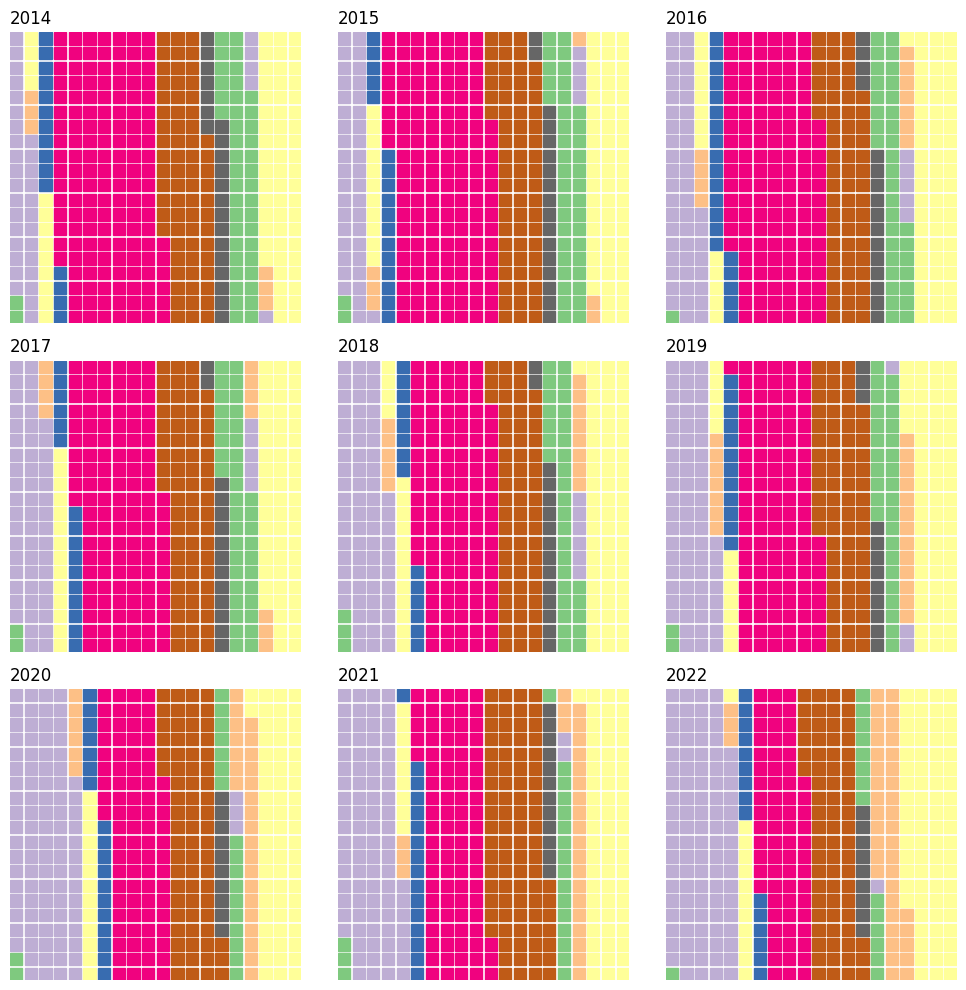

In [ ]:
fig = plt.figure()
plots = {}

scalar_mappable = None

for idx, year in enumerate(df_waffles.index[:-1]):
    plots[int('33'+str(idx+1))] = {
        'values': df_waffles.loc[year, :],
        'title': {'label': year, 'loc': 'left', 'fontsize': 12},
        # 'labels': [f"{k} ({v})" for k, v in df_waffles.loc[2014, :].items()],
        # 'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
    }

fig = plt.figure(
    FigureClass=Waffle,
    plots=plots,
    rows=20,  # Outside parameter applied to all subplots, same as below
    columns=20,
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',
    figsize=(10, 10),
)

# cmap = plt.get_cmap('Accent')
# a = df_waffles.loc[2014, :]
# normalize = plt.Normalize(a.min(), a.max())

# legend_labels = [k for k, _ in df_waffles.loc[2014, :].items()]
# common_legend = fig.legend(
#     handles=[plt.Line2D([0], [0], marker='o', color=cmap(normalize(v)), markerfacecolor=cmap(normalize(v)), markersize=10) for v in a],
#     labels=legend_labels,
#     loc='upper left', bbox_to_anchor=(1.05, 1), title='Common Legend'
# )

# plt.tight_layout()
plt.show()

In [ ]:
df_regression = df_waffles.sum(axis=1).to_frame()
df_regression.columns = ['ROBBERY_REPORTS_COUNT']
df_regression.reset_index(inplace=True)

<Axes: xlabel='REPORT_YEAR', ylabel='ROBBERY_REPORTS_COUNT'>

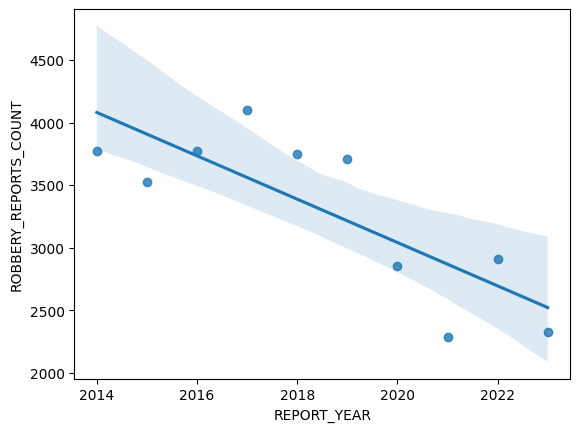

In [ ]:
sns.regplot(data=df_regression, x='REPORT_YEAR', y='ROBBERY_REPORTS_COUNT')

In [ ]:
df_cleanunique= df_clean['OFFENCE'].unique()
df_cleanunique

array(['Robbery - Swarming', 'Robbery - Mugging', 'Robbery - Business',
       'Robbery With Weapon', 'Robbery - Purse Snatch', 'Robbery - Other',
       'Robbery - Financial Institute', 'Robbery - Armoured Car',
       'Robbery - Vehicle Jacking', 'Robbery - Taxi',
       'Robbery - Home Invasion', 'Robbery - Delivery Person',
       'Robbery - Atm', 'Robbery To Steal Firearm'], dtype=object)

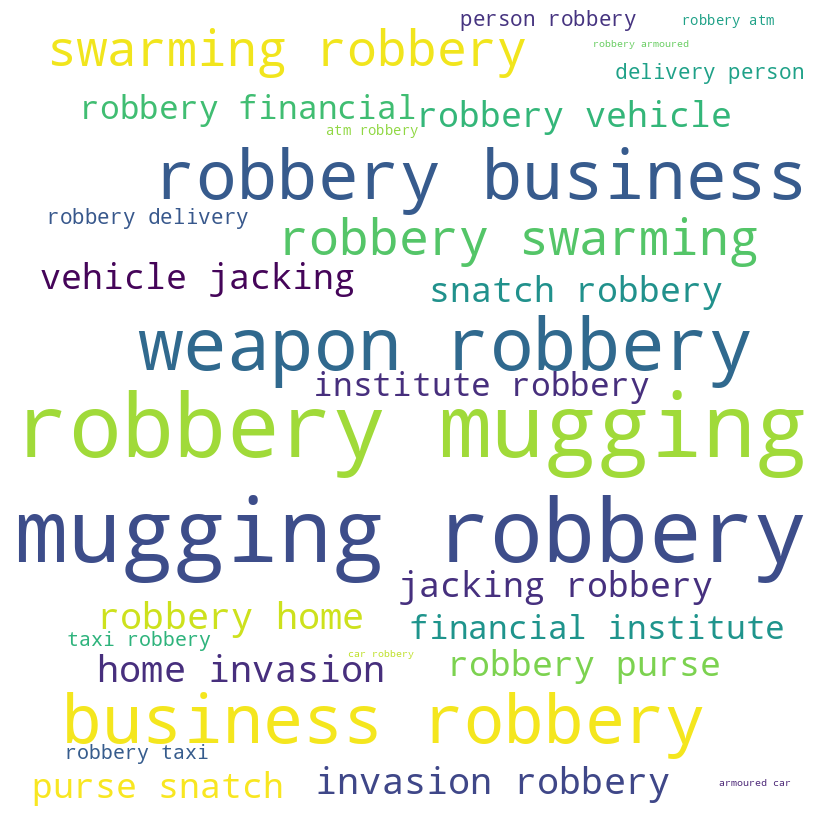

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_clean['OFFENCE']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
!pip3 install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [ ]:
# define the world map
#world_map = folium.Map()

# display world map
#world_map

In [ ]:
latitude = 43.651070
longitude = -79.347015
#Toronto_map = folium.Map(location=[43.651070, -79.347015], zoom_start=12,)
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
Toronto_map



In [ ]:
df_offence = df_clean[df_clean['OFFENCE'] == 'Robbery - Mugging']
limit = 100
df_mugging= df_offence.iloc[0:limit, :]
df_mugging.head()
#df_offence.head()


,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
1,6.327780e-09,5.664924e-09,2,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
8,-8.827887e+06,5.429837e+06,9,GO-20141265410,2014/01/02 05:00:00+00,2013/12/31 05:00:00+00,2014,January,2,2,...,1610,200,Robbery - Mugging,Robbery,119,Wexford/Maryvale,119,Wexford/Maryvale (119),-79.302263,43.769472
13,-8.861113e+06,5.424035e+06,14,GO-20141272968,2014/01/03 05:00:00+00,2013/12/24 05:00:00+00,2014,January,3,3,...,1610,200,Robbery - Mugging,Robbery,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.600737,43.731827
15,6.327780e-09,5.664924e-09,16,GO-20141283439,2014/01/04 05:00:00+00,2014/01/04 05:00:00+00,2014,January,4,4,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
20,-8.845786e+06,5.415058e+06,21,GO-20141285128,2014/01/05 05:00:00+00,2014/01/05 05:00:00+00,2014,January,5,5,...,1610,200,Robbery - Mugging,Robbery,91,Weston-Pelham Park,91,Weston-Pellam Park (91),-79.463047,43.673530


In [ ]:
#offences= folium.map.FeatureGroup()


In [ ]:
folium.__version__

'0.5.0'

In [ ]:
map_center = [df_offence['LONG_WGS84'].mean(), df_offence['LAT_WGS84'].mean()]
map_center
#Toronto_mug_map = folium.Map(location=map_center,zoom_start=12)


[-77.7724326646786, 42.82008518939447]

Unsafe Neighborhoods

In [ ]:
Toronto_mug_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#Toronto_mug__map

#oronto_mug_map=folium.Map(location=map_center,zoom=16)
for index,loc in df_mugging.iterrows():
    folium.CircleMarker( [loc['LAT_WGS84'],loc['LONG_WGS84']],
    radius=5,color='yellow',fill=True,fill_color='blue',
    fill_opacity=0.6).add_to(Toronto_mug_map)

for lat, lng, label in zip(df_mugging['LAT_WGS84'],df_mugging['LONG_WGS84'],df_mugging['OFFENCE']):
    folium.Marker([lat, lng], popup=label).add_to(Toronto_mug_map)
Toronto_mug_map
Toronto_mug_map.save("Mugging_areas__map.html")
Toronto_mug_map


In [ ]:
df_robberies= df_clean.iloc[0:limit, :]
df_robberies.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,6.327780e-09,5.664924e-09,1,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
1,6.327780e-09,5.664924e-09,2,GO-20141260577,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
2,-8.837004e+06,5.413576e+06,3,GO-20141262818,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,210,Robbery - Business,Robbery,167,Church-Wellesley,75,Church-Yonge Corridor (75),-79.384154,43.663898
3,-8.838990e+06,5.411070e+06,4,GO-20141260912,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401998,43.647607
4,-8.851703e+06,5.419157e+06,5,GO-20141262644,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1610,150,Robbery - Purse Snatch,Robbery,113,Weston,113,Weston (113),-79.516198,43.700152


In [ ]:
for index,loc in df_robberies.iterrows():
    folium.CircleMarker( [loc['LAT_WGS84'],loc['LONG_WGS84']],
    radius=5,color='yellow',fill=True,fill_color='blue',
    fill_opacity=0.6).add_to(Toronto_map)

for lat, lng, label in zip(df_robberies['LAT_WGS84'],df_robberies['LONG_WGS84'],df_robberies['OFFENCE']):
    folium.Marker([lat, lng], popup=label).add_to(Toronto_map)
Toronto_map

In [ ]:
df_grouped.columns

Index(['EVENT_UNIQUE_ID'], dtype='object')

In [ ]:

#BUBBLE PLOT USING PLOTLY



bubdata = df_clean.groupby(['REPORT_YEAR', 'OFFENCE']).agg({'EVENT_UNIQUE_ID': 'count'}).reset_index()

fig = px.scatter(bubdata, x="REPORT_YEAR", y="EVENT_UNIQUE_ID",hover_name="OFFENCE",
                 title='Robbery Statistics',size_max=60)

fig.update_layout(title='Robbery Statistics', xaxis_title='REPORT YEAR', yaxis_title='EVENT COUNT')
fig.show()